In [1]:
import math
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as sk
#from matplotlib import rcParams
from IPython.display import Image, display, HTML
from mpl_toolkits.mplot3d import Axes3D
mpl.use('TkAgg')
%matplotlib inline
dataPath = os.path.join('../../../data/old/isosuiteMarch')

In [2]:
modelList = [('isobenchLIGHT2' + str(number).zfill(3)) for number in range(42)]
modelList += [('isobenchLIGHT3' + str(number).zfill(3)) for number in range(68)]
modelList += [('isobenchLIGHT4' + str(number).zfill(3)) for number in range(99)]

In [3]:
directoryList = [os.path.join(dataPath, entry) for entry in modelList]

In [4]:
dataList = []
inputList = []
for name in directoryList:
#     with (name / 'inputs.txt').open() as json_file:
    with open(os.path.join(name, 'inputs.txt')) as json_file:
        inputList.append(json.load(json_file)['params'])
    data = pd.read_csv(os.path.join(name, 'zerodData.csv'))
    goodheader = ''.join(list(data.columns.values))[2:].split(' ')
    data.columns = goodheader
    dataList.append(data)
outputFrame = pd.concat(dataList, keys = modelList)
inputFrame = pd.DataFrame(inputList, index = modelList)
inputFrame['f'] = 1. / inputFrame.ratio

In [35]:
inputFrame.loc[inputFrame['Ra'] == 1e6]

,Ra,aspect,buoyancy,creep,deltaT,diffusivity,heating,length,periodic,ratio,res,surfT,f
isobenchLIGHT4088,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,1.0001,32,0.0,0.999900
isobenchLIGHT4089,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,1.5000,32,0.0,0.666667
isobenchLIGHT4090,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,2.0000,32,0.0,0.500000
isobenchLIGHT4091,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,2.5000,32,0.0,0.400000
isobenchLIGHT4092,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,3.0000,32,0.0,0.333333
isobenchLIGHT4093,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,3.5000,32,0.0,0.285714
isobenchLIGHT4094,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,4.0000,32,0.0,0.250000
isobenchLIGHT4095,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,4.5000,32,0.0,0.222222
isobenchLIGHT4096,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,5.0000,32,0.0,0.200000
isobenchLIGHT4097,1000000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,False,5.5000,32,0.0,0.181818


In [20]:
round(0.99, 2)

0.99

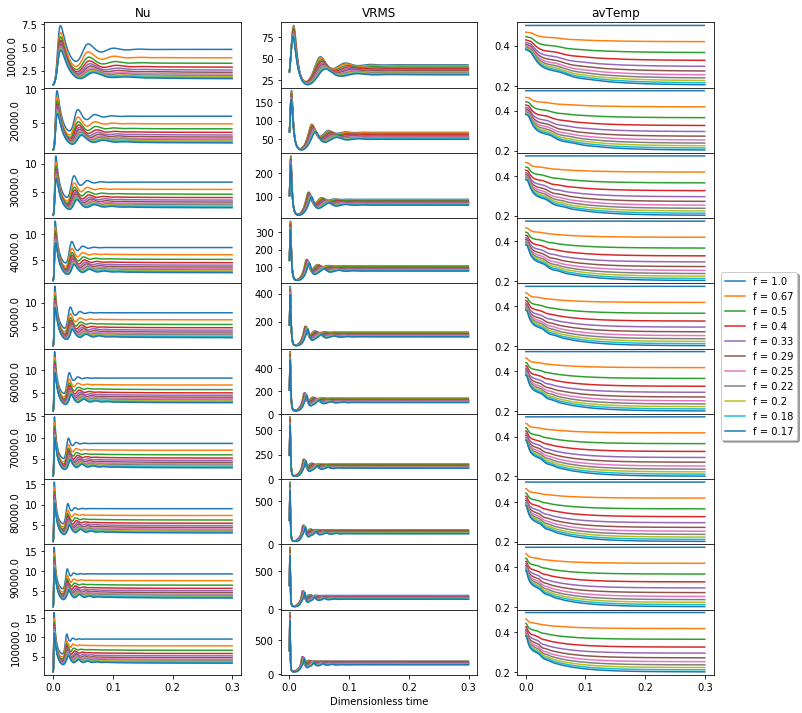

In [24]:
res = 32
maxtime = .3

rowName = 'Ra'
rows = sorted(list(set(inputFrame.Ra.loc[inputFrame.Ra <= 1e5])))
cols = ['Nu', 'VRMS', 'avTemp']

fig, axs = plt.subplots(len(rows), len(cols), sharex=True, figsize = (12, 12))

for row, val in enumerate(rows):
    indices = inputFrame.loc[inputFrame[rowName] == val].loc[inputFrame['res'] == res].index
    for index in indices:
        frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
        for col, val in enumerate(cols):
            ignoreme = axs[row][col].plot(frame.modeltime, frame[val])

for index, val in enumerate(cols):
    axs[0][index].set_title(val)
for index, val in enumerate(rows):
    axs[index][0].set_ylabel(val)
axs[len(rows) - 1][int(len(cols) / 2)].set_xlabel('Dimensionless time')

legendtext = ['f = ' + str(round(val, 2)) for val in list(inputFrame.loc[indices].f)]
legend = plt.figlegend(
    legendtext,
    loc='right',
    shadow = True,
#     mode = 'expand',
    )
fig.subplots_adjust(hspace=0)
# fig.suptitle('Isoviscous suite: res = ' + str(res))
fig.show()
plt.savefig('isobenchFullchunk1.png', dpi=300)

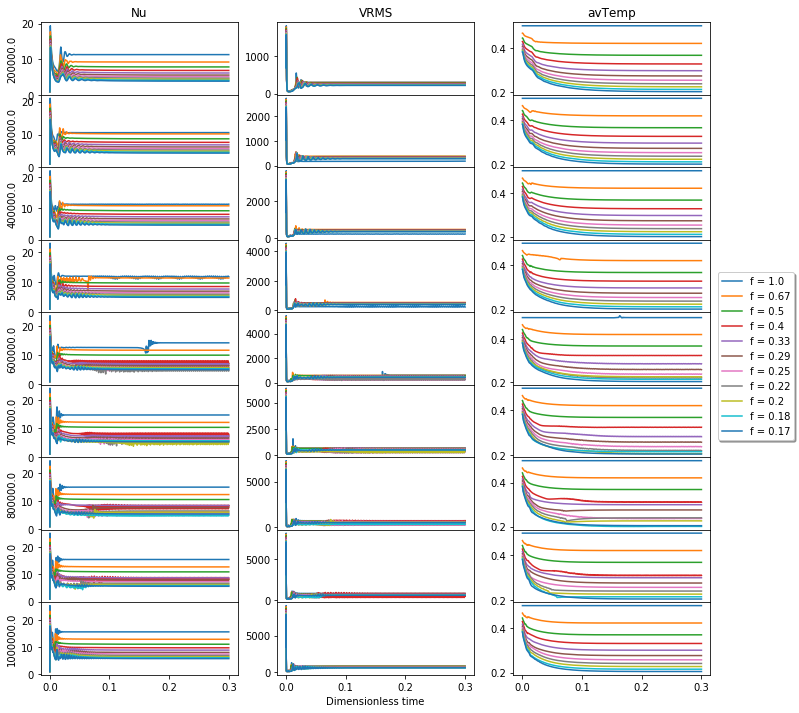

In [25]:
res = 32
maxtime = .3

rowName = 'Ra'
rows = sorted(list(set(inputFrame.Ra.loc[inputFrame.Ra > 1e5])))
cols = ['Nu', 'VRMS', 'avTemp']

fig, axs = plt.subplots(len(rows), len(cols), sharex=True, figsize = (12, 12))

for row, val in enumerate(rows):
    indices = inputFrame.loc[inputFrame[rowName] == val].loc[inputFrame['res'] == res].index
    for index in indices:
        frame = outputFrame.loc[outputFrame['modeltime'] < maxtime].loc[index]
        for col, val in enumerate(cols):
            ignoreme = axs[row][col].plot(frame.modeltime, frame[val])

for index, val in enumerate(cols):
    axs[0][index].set_title(val)
for index, val in enumerate(rows):
    axs[index][0].set_ylabel(val)
axs[len(rows) - 1][int(len(cols) / 2)].set_xlabel('Dimensionless time')

legendtext = ['f = ' + str(round(val, 2)) for val in list(inputFrame.loc[indices].f)]
legend = plt.figlegend(
    legendtext,
    loc='right',
    shadow = True,
#     mode = 'expand',
    )
fig.subplots_adjust(hspace=0)
# fig.suptitle('Isoviscous suite: res = ' + str(res))
fig.show()
plt.savefig('isobenchFullchunk2.png', dpi=300)

In [36]:
indices = inputFrame.loc[inputFrame['res'] == 32].loc[inputFrame['Ra'] <= 1e5].index
allwaDict = {}
for index in indices:
    waDict = {}
    frame = outputFrame.loc[outputFrame['modeltime'] > 0.2].loc[index]
    tIntervals = frame['modeltime'].diff()
    for item in frame.columns.values:
        if not item == 'modeltime':
            waDict[item + '_tAv'] = np.average(frame[item][1:], weights = tIntervals[1:])
    allwaDict[index] = waDict
reductionFrame = pd.DataFrame(allwaDict).transpose()

superFrame = pd.concat([inputFrame.loc[indices], reductionFrame], axis = 1)[
    ['Ra', 'f', 'Nu_tAv', 'VRMS_tAv', 'avTemp_tAv', 'surfVRMS_tAv']
    ]

In [148]:
superFrame['logRa'] = np.log(superFrame.Ra)
superFrame['logNu'] = np.log(superFrame.Nu_tAv)
superFrame['logf'] = np.log(superFrame.f)
superFrame['logAvTemp'] = np.log(superFrame.avTemp_tAv)
superFrame['invf'] = 1. / superFrame.f
superFrame['f2'] = superFrame.f ** 2
superFrame['Sqrt_f'] = superFrame.f ** 0.5
superFrame['negSqRtf'] = superFrame.f ** -0.5
superFrame['Raf2'] = superFrame.f ** 2. * superFrame.Ra
superFrame['logRaf2'] = np.log(superFrame.Raf2)

In [149]:
superFrame

,Ra,f,Nu_tAv,VRMS_tAv,avTemp_tAv,surfVRMS_tAv,logRa,logNu,logf,logAvTemp,invf,f2,invRootf,negSqRtf,Raf2,logRaf2,Sqrt_f
isobenchLIGHT2000,10000.0,0.999900,4.776153,42.835953,0.499980,45.387037,9.210340,1.563635,-0.000100,-0.693187,1.0001,0.999800,0.999950,1.000050,9998.000300,9.210140,0.999950
isobenchLIGHT2001,10000.0,0.666667,3.882095,41.931269,0.420412,46.921878,9.210340,1.356375,-0.405465,-0.866521,1.5000,0.444444,0.816497,1.224745,4444.444444,8.399410,0.816497
isobenchLIGHT2002,10000.0,0.500000,3.300035,40.338599,0.367045,46.858994,9.210340,1.193933,-0.693147,-1.002269,2.0000,0.250000,0.707107,1.414214,2500.000000,7.824046,0.707107
isobenchLIGHT2003,10000.0,0.400000,2.888953,38.724758,0.328599,46.226995,9.210340,1.060894,-0.916291,-1.112918,2.5000,0.160000,0.632456,1.581139,1600.000000,7.377759,0.632456
isobenchLIGHT2004,10000.0,0.333333,2.584585,37.259437,0.299197,45.466068,9.210340,0.949565,-1.098612,-1.206654,3.0000,0.111111,0.577350,1.732051,1111.111111,7.013116,0.577350
isobenchLIGHT2005,10000.0,0.285714,2.346151,35.944424,0.276275,44.565947,9.210340,0.852776,-1.252763,-1.286358,3.5000,0.081633,0.534522,1.870829,816.326531,6.704814,0.534522
isobenchLIGHT2006,10000.0,0.250000,2.155265,34.778076,0.257722,43.662937,9.210340,0.767914,-1.386294,-1.355873,4.0000,0.062500,0.500000,2.000000,625.000000,6.437752,0.500000
isobenchLIGHT2007,20000.0,0.999900,5.981170,68.216452,0.499980,73.243380,9.903488,1.788616,-0.000100,-0.693188,1.0001,0.999800,0.999950,1.000050,19996.000600,9.903288,0.999950
isobenchLIGHT2008,20000.0,0.666667,4.860099,66.770871,0.419636,75.514284,9.903488,1.581059,-0.405465,-0.868368,1.5000,0.444444,0.816497,1.224745,8888.888889,9.092557,0.816497
isobenchLIGHT2009,20000.0,0.500000,4.126669,64.227903,0.365712,75.309547,9.903488,1.417471,-0.693147,-1.005908,2.0000,0.250000,0.707107,1.414214,5000.000000,8.517193,0.707107


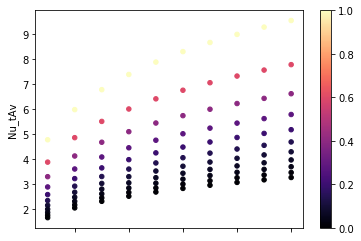

In [40]:
superFrame.plot.scatter(
    'Ra',
    'Nu_tAv',
    c = mpl.colors.Normalize()(superFrame.f.values),
    cmap = 'magma',
    )

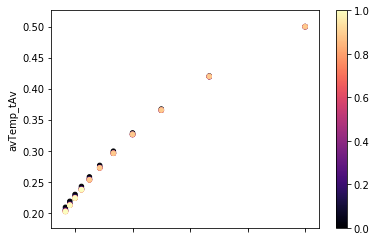

In [41]:
superFrame.plot.scatter(
    'f',
    'avTemp_tAv',
    c = mpl.colors.Normalize()(superFrame.Ra.values),
    cmap = 'magma',
    )

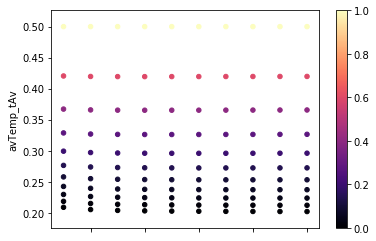

In [102]:
superFrame.plot.scatter(
    'Ra',
    'avTemp_tAv',
    c = mpl.colors.Normalize()(superFrame.f.values),
    cmap = 'magma',
    )

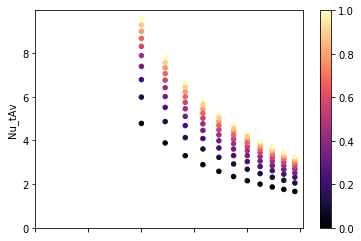

In [42]:
superFrame.plot.scatter(
    'negSqRtf',
    'Nu_tAv',
    c = mpl.colors.Normalize()(superFrame.Ra.values),
    cmap = 'magma',
    xlim = 0.,
    ylim = 0.,
    )

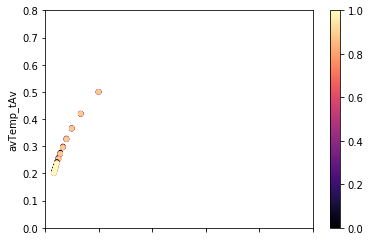

In [43]:
superFrame.plot.scatter(
    'f',
    'avTemp_tAv',
    c = mpl.colors.Normalize()(superFrame.Ra.values),
    cmap = 'magma',
    xlim = (0., 5.),
    ylim = (0., 0.8),
    )

In [44]:
from sklearn import linear_model

In [45]:
lmOut = []
fs = sorted(set(superFrame.f))
for f in fs:
    lm = linear_model.LinearRegression(fit_intercept = True)
    localFrame = superFrame.loc[superFrame.f == f]
    dataX = [[item] for item in np.log(localFrame.Ra)]
    dataY = np.log(localFrame.Nu_tAv)
    lm.fit(dataX, dataY)
    lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [46]:
logRalogNu = list(zip(np.round(fs, 2), lmOut))

In [47]:
for row in logRalogNu: print(row)

(0.17, (0.2931386536735036, -2.1862969946382957, 0.9997440075981255))
(0.18, (0.2945488237597628, -2.1429887723936023, 0.9997084364673884))
(0.2, (0.295939082536012, -2.0940838616068187, 0.9996677218161343))
(0.22, (0.2972963083772621, -2.0384413411931295, 0.9996208818243479))
(0.25, (0.29858994101006403, -1.9744275707003403, 0.9995657966929966))
(0.29, (0.2998035881076335, -1.9001239151974096, 0.9994987459476857))
(0.33, (0.3008836963222049, -1.8125702178308443, 0.9994147981352346))
(0.4, (0.3006047957205856, -1.6976344960113563, 0.9992752913961589))
(0.5, (0.3009435451898099, -1.5667647647443648, 0.9991381354663053))
(0.67, (0.3005832431424525, -1.3999653060466866, 0.9989688187152083))
(1.0, (0.299161991374264, -1.1786657388466302, 0.9987943468472192))


In [116]:
logRalogNuarr = np.array([row[1] for row in logRalogNu])
logRalogNuarrAverage = np.average(logRalogNuarr[:,0])
logRalogNuarrAverage

0.2983176062921414

In [118]:
np.max(abs((logRalogNuarr[:,0] - logRalogNuarrAverage) / logRalogNuarrAverage))

0.017360532899845127

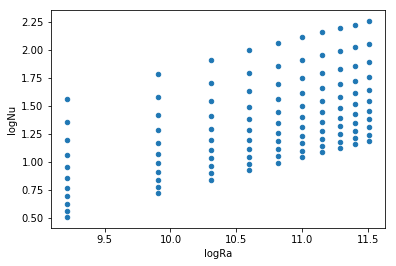

In [71]:
superFrame.plot.scatter(
    'logRa',
    'logNu',
#     c = mpl.colors.Normalize()(superFrame.f.values),
#     cmap = 'magma',
    )
plt.savefig('plotlogRalogNu.png')

In [49]:
lmOut = []
Ras = sorted(set(superFrame.Ra))
for Ra in Ras:
    lm = linear_model.LinearRegression(fit_intercept = True)
    localFrame = superFrame.loc[superFrame.Ra == Ra]
    dataX = [[item] for item in np.log(localFrame.f)]
    dataY = np.log(localFrame.Nu_tAv)
    lm.fit(dataX, dataY)
    lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [50]:
logflogNu = list(zip(Ras, lmOut))

In [51]:
logflogNu

[(10000.0, (0.5972142027368564, 1.592466697432257, 0.9983012067543713)),
 (20000.0, (0.6053790195018218, 1.8203473388521627, 0.9979543340260107)),
 (30000.0, (0.6080093028386548, 1.9468725137851672, 0.997763525580615)),
 (40000.0, (0.6088894153451104, 2.0336048610311512, 0.9976350838011652)),
 (50000.0, (0.6090060144914945, 2.0990929237509817, 0.9975313151563103)),
 (60000.0, (0.6087296800471607, 2.151390579091293, 0.9974416526609065)),
 (70000.0, (0.608257767781468, 2.1947400789322553, 0.9973684353844766)),
 (80000.0, (0.6076864804594373, 2.231634907267921, 0.9973157479432184)),
 (90000.0, (0.6070388319062646, 2.2636237786882565, 0.9972742370716503)),
 (100000.0, (0.606349792965863, 2.2917882288070235, 0.9972396992230715))]

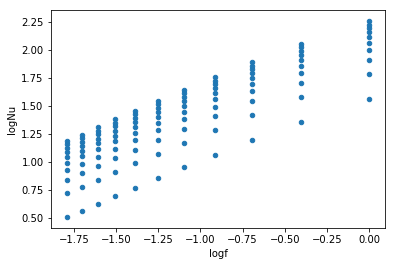

In [74]:
superFrame.plot.scatter(
    'logf',
    'logNu',
#     c = mpl.colors.Normalize()(superFrame.Ra.values),
#     cmap = 'magma',
    )
plt.savefig('plotlogflogNu.png')

In [53]:
lmOut = []
Ras = sorted(set(superFrame.Ra))
for Ra in Ras:
    lm = linear_model.LinearRegression(fit_intercept = False)
    localFrame = superFrame.loc[superFrame.Ra == Ra]
    dataX = [[item] for item in localFrame.f ** -0.6]
    dataY = localFrame.Nu_tAv
    lm.fit(dataX, dataY)
    lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [54]:
fInvSqRootvsNu = list(zip(Ras, lmOut))

In [55]:
fInvSqRootvsNu

[(10000.0, (1.0692150050824294, 0.0, -2.0279852055411647)),
 (20000.0, (1.3306317298485397, 0.0, -1.994286257854652)),
 (30000.0, (1.505672362815829, 0.0, -1.9848638151392932)),
 (40000.0, (1.6404857458981013, 0.0, -1.9827207939956155)),
 (50000.0, (1.751294920886302, 0.0, -1.983770379948718)),
 (60000.0, (1.8459014784718428, 0.0, -1.9864380693979813)),
 (70000.0, (1.9287077906740027, 0.0, -1.9897685625565562)),
 (80000.0, (2.0024839417234883, 0.0, -1.9932592917743346)),
 (90000.0, (2.0690833032951175, 0.0, -1.9969498548647577)),
 (100000.0, (2.1298353366247893, 0.0, -2.000741317663284))]

In [56]:
lmOut = []
fs = sorted(set(superFrame.f))
for f in fs:
    lm = linear_model.LinearRegression(fit_intercept = False)
    localFrame = superFrame.loc[superFrame.f == f]
    dataX = [[item] for item in localFrame.Ra ** 0.3]
    dataY = localFrame.Nu_tAv
    lm.fit(dataX, dataY)
    lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [57]:
RaexpNu = list(zip(np.round(fs, 2), lmOut))

In [58]:
RaexpNu

[(0.17, (0.10417381252814235, 0.0, 0.999014455929291)),
 (0.18, (0.11047660156618166, 0.0, 0.9991844957022818)),
 (0.2, (0.11779250552593822, 0.0, 0.9993130285890588)),
 (0.22, (0.12639607545064188, 0.0, 0.9994006511859124)),
 (0.25, (0.1366727526789386, 0.0, 0.9994469767175534)),
 (0.29, (0.14918239464115485, 0.0, 0.9994528092231175)),
 (0.33, (0.16476721869246524, 0.0, 0.9994175851349894)),
 (0.4, (0.18426541103831368, 0.0, 0.9992604536223678)),
 (0.5, (0.21080343950581606, 0.0, 0.9991376309550962)),
 (0.67, (0.24807764827363182, 0.0, 0.9989415580003035)),
 (1.0, (0.3047332064226851, 0.0, 0.9986415844084718))]

In [59]:
lmOut = []
Ras = sorted(set(superFrame.Ra))
for f in fs:
    lm = linear_model.LinearRegression(fit_intercept = True)
    localFrame = superFrame.loc[superFrame.f == f]
    dataX = [[item] for item in localFrame.Ra]
    dataY = localFrame.avTemp_tAv
    lm.fit(dataX, dataY)
    lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [60]:
RaavTemp = list(zip(np.round(fs, 2), lmOut))

In [61]:
RaavTemp

[(0.17, (-5.746737202342612e-08, 0.20649157330644005, 0.6602434780981834)),
 (0.18, (-5.295607413732294e-08, 0.21617534554149068, 0.6430299754005058)),
 (0.2, (-4.804051239156355e-08, 0.22734300522345577, 0.6218086608018583)),
 (0.22, (-4.2657237529020464e-08, 0.24038541110067685, 0.5945105662526318)),
 (0.25, (-3.6856483300690034e-08, 0.25585547128129893, 0.5591154811290673)),
 (0.29, (-3.054311022636134e-08, 0.2745413811034757, 0.5121387529054251)),
 (0.33, (-2.3765848272372213e-08, 0.2976301800320142, 0.4491299341329762)),
 (0.4, (-1.4315266729536972e-08, 0.32728107179127064, 0.3153724097981456)),
 (0.5, (-8.091408394122998e-09, 0.36602076641739956, 0.20583137306653065)),
 (0.67, (-3.2182389357994123e-09, 0.4197989075060326, 0.10926532402806109)),
 (1.0, (-2.0238349140326783e-12, 0.499979871658062, 0.43795242525638045))]

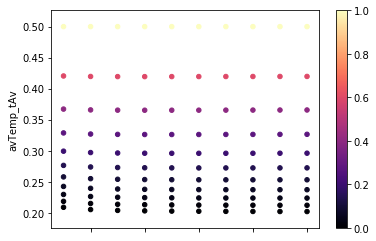

In [62]:
superFrame.plot.scatter(
    'Ra',
    'avTemp_tAv',
    c = mpl.colors.Normalize()(superFrame.f.values),
    cmap = 'magma',
    )

In [147]:
lmOut = []
# Ras = sorted(set(superFrame.Ra))
# for Ra in Ras:
lm = linear_model.LinearRegression(fit_intercept = True)
localFrame = superFrame
dataX = [[item] for item in localFrame.logf]
dataY = localFrame.logAvTemp
lm.fit(dataX, dataY)
lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [142]:
logflogavTemp = lmOut

In [143]:
logflogavTemp

[(0.5095718868909203, -0.6673052633161516, 0.9977335064296815)]

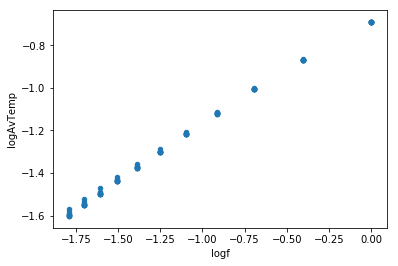

In [70]:
superFrame.plot.scatter(
    'logf',
    'logAvTemp',
#     c = mpl.colors.Normalize()(superFrame.f.values),
#     cmap = 'magma',
    )
plt.savefig('plotlogflogAvTemp.png')

In [157]:
lmOut = []
# Ras = sorted(set(superFrame.Ra))
# for Ra in Ras:
lm = linear_model.LinearRegression(fit_intercept = False)
localFrame = superFrame
dataX = [[item] for item in localFrame.Sqrt_f]
dataY = localFrame.avTemp_tAv
lm.fit(dataX, dataY)
lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [158]:
Sqrt_fav_Temp_tAv = lmOut

In [159]:
Sqrt_fav_Temp_tAv

[(0.508297470308887, 0.0, 0.9975133786643542)]

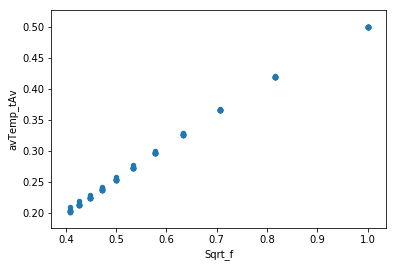

In [156]:
superFrame.plot.scatter(
    'Sqrt_f',
    'avTemp_tAv',
#     c = mpl.colors.Normalize()(superFrame.f.values),
#     cmap = 'magma',
    )

In [67]:
lmOut = []
lm = linear_model.LinearRegression(fit_intercept = True)
dataX = list(zip(superFrame.logRa, superFrame.logf))
dataY = superFrame.logNu
lm.fit(dataX, dataY)
lmOut.append((np.round(lm.coef_, 3), round(lm.intercept_, 3), round(lm.score(dataX, dataY), 3)))

In [75]:
logRalogflogNu = list(zip(Ras, lmOut))

In [76]:
logRalogflogNu

[(10000.0, (array([0.298, 0.607]), -1.136, 0.998))]

In [77]:
lmOut = []
lm = linear_model.LinearRegression(fit_intercept = True)
dataX = list(zip(superFrame.logRa, np.log(superFrame.f2)))
dataY = superFrame.logNu
lm.fit(dataX, dataY)
lmOut.append((np.round(lm.coef_, 3), round(lm.intercept_, 3), round(lm.score(dataX, dataY), 3)))

In [78]:
logRalogf2logNu = lmOut

In [79]:
logRalogf2logNu

[(array([0.298, 0.303]), -1.136, 0.998)]

In [80]:
lmOut = []
Ras = sorted(set(superFrame.Ra))
lm = linear_model.LinearRegression(fit_intercept = True)
dataX = [[row[0]] for row in logf2logNu]
dataY = [math.e ** row[1][1] for row in logf2logNu]
lm.fit(dataX, dataY)
lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

NameError: name 'logf2logNu' is not defined

In [81]:
logf2logNuRaInt = lmOut

In [82]:
logf2logNuRaInt

[]

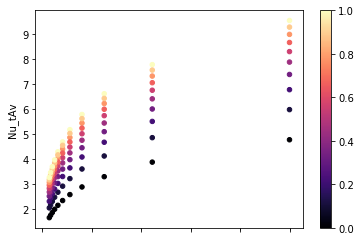

In [85]:
superFrame.plot.scatter(
    'f2',
    'Nu_tAv',
    c = mpl.colors.Normalize()(superFrame.Ra.values),
    cmap = 'magma',
    )

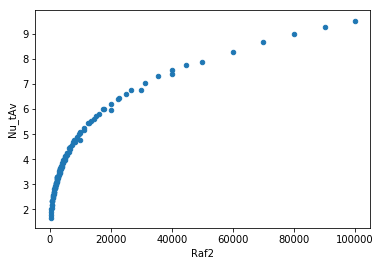

In [88]:
superFrame.plot.scatter(
    'Raf2',
    'Nu_tAv',
#     c = mpl.colors.Normalize()(superFrame.Ra.values),
#     cmap = 'magma',
    )

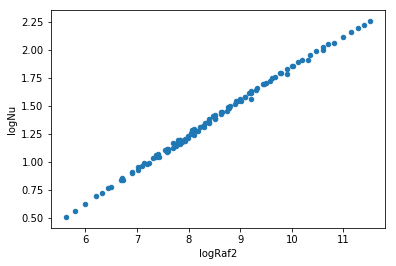

In [95]:
superFrame.plot.scatter(
    'logRaf2',
    'logNu',
#     ylim = (0., 2.5),
#     xlim = (0., 12.)
#     c = mpl.colors.Normalize()(superFrame.Ra.values),
#     cmap = 'magma',
    )
plt.savefig("plotregression.png")

In [ ]:
lmOut = []
lm = linear_model.LinearRegression(fit_intercept = False)
localFrame = superFrame
dataX = [[item] for item in (superFrame.Ra * superFrame.f2)**0.3]
dataY = superFrame.Nu_tAv
lm.fit(dataX, dataY)
lmOut.append((lm.coef_[0], lm.intercept_, lm.score(dataX, dataY)))

In [ ]:
wholereductionfit = lmOut

In [ ]:
wholereductionfit